# [E-5] find similar face using Facenet

## Step 1 import modules and prepare image

file_list: ['미미.jpg', '유리.jpg', '태양.jpeg', '강민경.jpg', '온앤오프효진.jpg', '김래원.jpeg', '크리스 에반스.jpg', '효정.jpg', '지디.jpg', '이대호.jpeg', '이경규.jpeg', '디오.jpeg', '브래들리 쿠퍼.jpg', '신태용.jpg', '김민재.jpeg', '곽도원.jpg', '저스틴 존슨.jpeg', '화사.jpg', '이진호.jpeg', '박희순.jpg', '최준.jpg', 'RM.jpg', '러블리즈지수.jpeg', '백윤식.png', '잭 갤리퍼내키스.jpg', '장도연.jpg', '장동건.jpeg', '고창석.jpeg', '권현빈.jpg', '씨잼.jpg', '지민(BTS).jpg', '박명수.jpg', '박진영.jpg', '민니.jpg', '리아.jpg', '서장훈.jpg', '러블리즈예인.jpg', '심수창.jpeg', '이연걸.jpeg', '레인보우재경.jpg', '잇지예지.jpeg', '장성호.jpeg', '제니.jpg', '조인성.jpg', '박진영.jpeg', '정수빈.jpg', '나인뮤지스경리.jpg', '이재용.jpg', '한기범.jpg', '김상호.png', '트와이스다현.jpeg', '류승범.jpg', '조승우.jpeg', '이광수.jpg', '안재홍.jpg', '김광현.jpg', 'clinton.jpeg', '리암 니슨.png', '이성민.jpg', '노홍철.jpeg', '최준석.jpg', '권태원.jpeg', 'obama.jpg', '기성용.jpg', '김남주.jpeg', 'biden.jpg', '찬열.jpeg', '박재범.jpg', '박성호.jpg', '톰 홀랜드.jpg', '슬리피.jpg', '시우민.jpg', '박서준.jpeg', '김희철.jpg', '노무현.jpeg', '진.jpg', '리사.jpg', '문재인.jpeg', '제이홉.jpg', '철면수심.jpg', '박용택.jpg', '슈가.jpg', '강미나.jpg', '슈퍼비.jpeg', '손

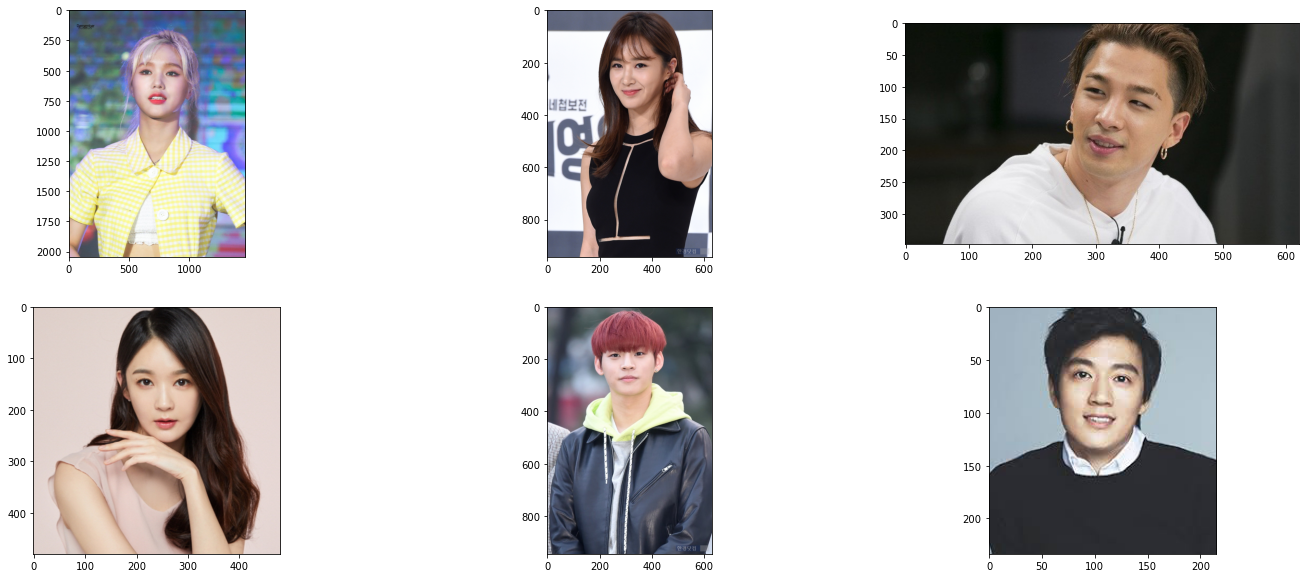

In [2]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import face_recognition
from PIL import Image

dir_path = os.getenv('HOME')+'/aiffel/face_embedding/celeb_images/celebrity'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

#Set figsize here
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24,10))

# flatten axes for easy iterating
for i, ax in enumerate(axes.flatten()):
    if i>5:
        break
    image = img.imread(dir_path+'/'+file_list[i])
    ax.imshow(image)
plt.show()


fig.tight_layout()


## Step2. Crop and Store as PIL image
###    힌트
###    from PIL import Image
###    face = get_gropped_face(image_path)
###    pillow_image = Image.fromarray(face)
###    pillow_image.save(path_to_save)

1) Test Cropping with get_cropped_face
2) store face images into 'celeb_faces' directory

In [4]:

def get_cropped_face(image_file):
    # [[YOUR CODE]]
    try :
        image = face_recognition.load_image_file(image_file)
       
    except FileNotFoundError :
        print("파일이 없어용~데헷")
    face_locations = face_recognition.face_locations(image)
    print(face_locations)  # 이미지에서 얼굴 영역의 좌표를 출력합니다.
    if len(face_locations)>0:
        a, b, c, d = face_locations[0]
        cropped_face = image[a:c,d:b,:]
        return cropped_face
#face = get_cropped_face(image_path)
#plt.imshow(face)

## store to other directory
path = os.getenv('HOME')+'/aiffel/face_embedding/celeb_images/celeb_faces'
for file in file_list:
    image_path = os.path.join(dir_path,file)
    face = get_cropped_face(image_path)
    if face is None:
        print('detected no face')
        continue
    pillow_image = Image.fromarray(face)
    pillow_image.save(os.path.join(path,file))
    print(f'{file} saved successfully!')

[(400, 964, 862, 502)]
미미.jpg saved successfully!
[(142, 414, 365, 191)]
유리.jpg saved successfully!
[(57, 407, 242, 221)]
태양.jpeg saved successfully!
[(98, 322, 253, 167)]
강민경.jpg saved successfully!
[(118, 414, 341, 191)]
온앤오프효진.jpg saved successfully!
[(47, 146, 121, 71)]
김래원.jpeg saved successfully!
[(98, 218, 253, 64)]
크리스 에반스.jpg saved successfully!
[(196, 633, 285, 544), (126, 394, 216, 305)]
효정.jpg saved successfully!
[(118, 365, 341, 142)]
지디.jpg saved successfully!
[(26, 118, 78, 66)]
이대호.jpeg saved successfully!
[(26, 195, 116, 106)]
이경규.jpeg saved successfully!
[(167, 340, 390, 117)]
디오.jpeg saved successfully!
[(98, 366, 284, 180)]
브래들리 쿠퍼.jpg saved successfully!
[(110, 196, 239, 67)]
신태용.jpg saved successfully!
[(76, 135, 166, 46)]
김민재.jpeg saved successfully!
[(133, 304, 288, 150)]
곽도원.jpg saved successfully!
[(68, 163, 175, 55)]
저스틴 존슨.jpeg saved successfully!
[(171, 498, 439, 230)]
화사.jpg saved successfully!
[(116, 373, 270, 218)]
이진호.jpeg saved successfully!
[(56, 165,

3) make face_list (287)

In [63]:

face_list = os.listdir(path)

#print ("face_list: {}".format(face_list))
print(len(face_list),len(file_list))

287 288


## Step3. extracting embedding of face region
1) def get_face_embedding(face)
2) def get_face_embedding_dict(dir_path)

[(15, 221, 201, 35)]


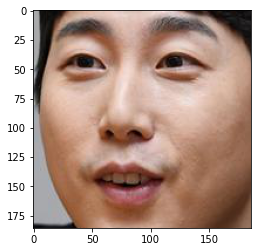

In [6]:
image_file = os.path.join(path, '장범준.jpg')
face = get_cropped_face(image_file)   # 얼굴 영역을 구하는 함수(이전 스텝에서 구현)
plt.imshow(face)
# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  


don't need additional cropping,,

In [7]:
def get_face_embedding_dict(path):
    file_list = os.listdir(path)
    embedding_dict = {}
	    
    for file in file_list:
        image_path = os.path.join(path, file)
        face = face_recognition.load_image_file(image_path)
       	embedding=get_face_embedding(face)
        if len(embedding) > 0:
            embedding_dict[os.path.splitext(file)[0]]=embedding[0]
    return embedding_dict


In [8]:
embedding_dict = get_face_embedding_dict(path)
embedding_dict['장범준']

array([-0.03604282,  0.03745953,  0.03873869, -0.0645213 , -0.09252937,
       -0.01178771, -0.03828286, -0.08801796,  0.13495897, -0.1154707 ,
        0.16509029, -0.04966162, -0.19469275, -0.09741338, -0.05718016,
        0.15714709, -0.16482456, -0.12217258, -0.03818908,  0.005921  ,
        0.10430021,  0.07073446, -0.00394561,  0.01727306, -0.08346242,
       -0.29060456, -0.10800847, -0.03155325,  0.00916049, -0.05214286,
       -0.0703688 ,  0.07459107, -0.17914651, -0.04798062,  0.03600283,
        0.09233052, -0.00487734, -0.06191239,  0.16000231,  0.02659042,
       -0.2106998 ,  0.07395929,  0.07938862,  0.22628443,  0.16195337,
        0.0016135 ,  0.04615067, -0.17321055,  0.14274533, -0.12500229,
        0.01495409,  0.17046222,  0.11456005,  0.06317083,  0.02972179,
       -0.1131525 ,  0.0213181 ,  0.12729965, -0.05541153,  0.05020547,
        0.09395242, -0.01339249, -0.0280339 , -0.10375711,  0.17793614,
       -0.02953437, -0.09928779, -0.21692447,  0.11973999, -0.12

## Step4. Comparing with other celebrities!

### 1) define function caculating L2 distance btw the two Embedding vector
### 2) embody function finding the closest image

In [9]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('류제성1', '류제성2')

0.36736299802028016

In [10]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('류제성2')   
# 이렇게 생성된 함수 sort_key_func는 sort_key_func('obama') 라고 호출할 때 trump와 obama 사이의 임베딩 벡터 거리를 계산합니다.

In [11]:
def get_nearest_face(name, top=5):
    # [[YOUR CODE]]
    sort_key_func = get_sort_key_func(name)
    sorted_list = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    for i,tup in enumerate(sorted_list):
        if i==0:
            continue
        distance = get_distance(name,tup[0])
        print(f'rank{i} : {tup[0]}, {distance}')
        if i==5:
            break

In [12]:
get_nearest_face('류제성1')

rank1 : 류제성2, 0.36736299802028016
rank2 : 장범준, 0.38999006463067204
rank3 : 류준열, 0.3932720568621862
rank4 : b1a4진영, 0.40406771446941564
rank5 : 이시언, 0.404965581853044


## Step5. attempt various interesting visualization~!
### matplotlib
### embedding dict 
 - key => filename,
 - value => embedding vector (shape: [128,])
1) change data to pandas.dataframe
2) visualize through PCA (2d)
3) visualize through tSNE(2d)

In [25]:
import pandas as pd
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

1) change data to pandas.dataframe

In [62]:
values = np.array(list(embedding_dict.values()))
keys = np.array(list(embedding_dict.keys()))
print(keys.shape)
df= pd.DataFrame(values,index= keys)
df

(275,)


,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
미미,-0.160067,0.111506,0.124828,-0.146204,-0.113062,0.003298,-0.075533,-0.094113,0.131778,-0.162493,...,0.120686,0.110456,0.012951,-0.039085,-0.235102,-0.013919,0.128316,0.005146,0.031603,0.035481
유리,-0.088861,0.074136,0.063071,-0.053604,-0.142045,-0.056516,-0.099223,-0.086282,0.079821,-0.139729,...,0.157272,0.069623,0.030921,-0.007732,-0.184124,-0.024383,0.073030,-0.097610,0.073633,0.005540
태양,-0.126969,0.042069,-0.026814,-0.018348,-0.128071,-0.022832,-0.035561,-0.143282,0.125676,-0.102769,...,0.107997,0.081831,0.007306,-0.012929,-0.213739,0.000896,0.082850,-0.036818,0.115916,0.002324
강민경,-0.078075,0.032551,0.061597,-0.074477,-0.159602,-0.018109,-0.090422,-0.070834,0.069658,-0.163771,...,0.152871,0.062889,-0.011013,0.000926,-0.232086,-0.049322,0.162890,-0.038575,0.128691,0.009629
온앤오프효진,-0.144493,0.058450,-0.007021,-0.072413,-0.181277,-0.064735,-0.095205,-0.118264,0.108308,-0.098128,...,0.139090,0.088150,0.008451,-0.009094,-0.172689,-0.010747,0.127606,-0.053142,0.132212,0.047415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
박항서,-0.088835,0.157229,0.122951,0.011873,-0.079416,-0.072673,-0.027846,-0.178833,0.048110,-0.082692,...,0.128817,0.126653,0.001984,-0.019992,-0.214283,-0.053168,0.058223,0.041409,-0.017501,0.001297
이종석,-0.042721,0.099131,0.071673,-0.028089,-0.091079,-0.030652,-0.123387,-0.066010,0.161715,-0.133919,...,0.133327,0.071669,-0.007611,-0.061018,-0.244297,-0.009953,0.071276,0.020799,0.044826,-0.000659
지드래곤,-0.056146,0.126568,0.048964,-0.020506,-0.062856,-0.018940,-0.006972,-0.170102,0.181442,-0.111702,...,0.077138,0.022149,0.010815,-0.071603,-0.259655,-0.011560,0.135704,0.040008,0.105333,0.003387
마크 러팔로,-0.082782,0.078420,-0.045592,-0.005411,-0.077494,0.012884,0.073208,-0.061605,0.117708,-0.022722,...,0.073501,0.053430,0.006344,0.024892,-0.197093,-0.184622,0.048567,0.024363,0.023733,-0.003788


In [57]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # 주성분을 몇개로 할지 결정
pca_2d = pca.fit_transform(df)
pca_2d.shape

(275, 2)

### korean font storage

In [ ]:
fontpath = os.getenv('HOME')+'/aiffel/face_embedding/ONE_Mobile_POP.ttf'
fontprop = fm.FontProperties(fname=fontpath, size=15)

### PCA output

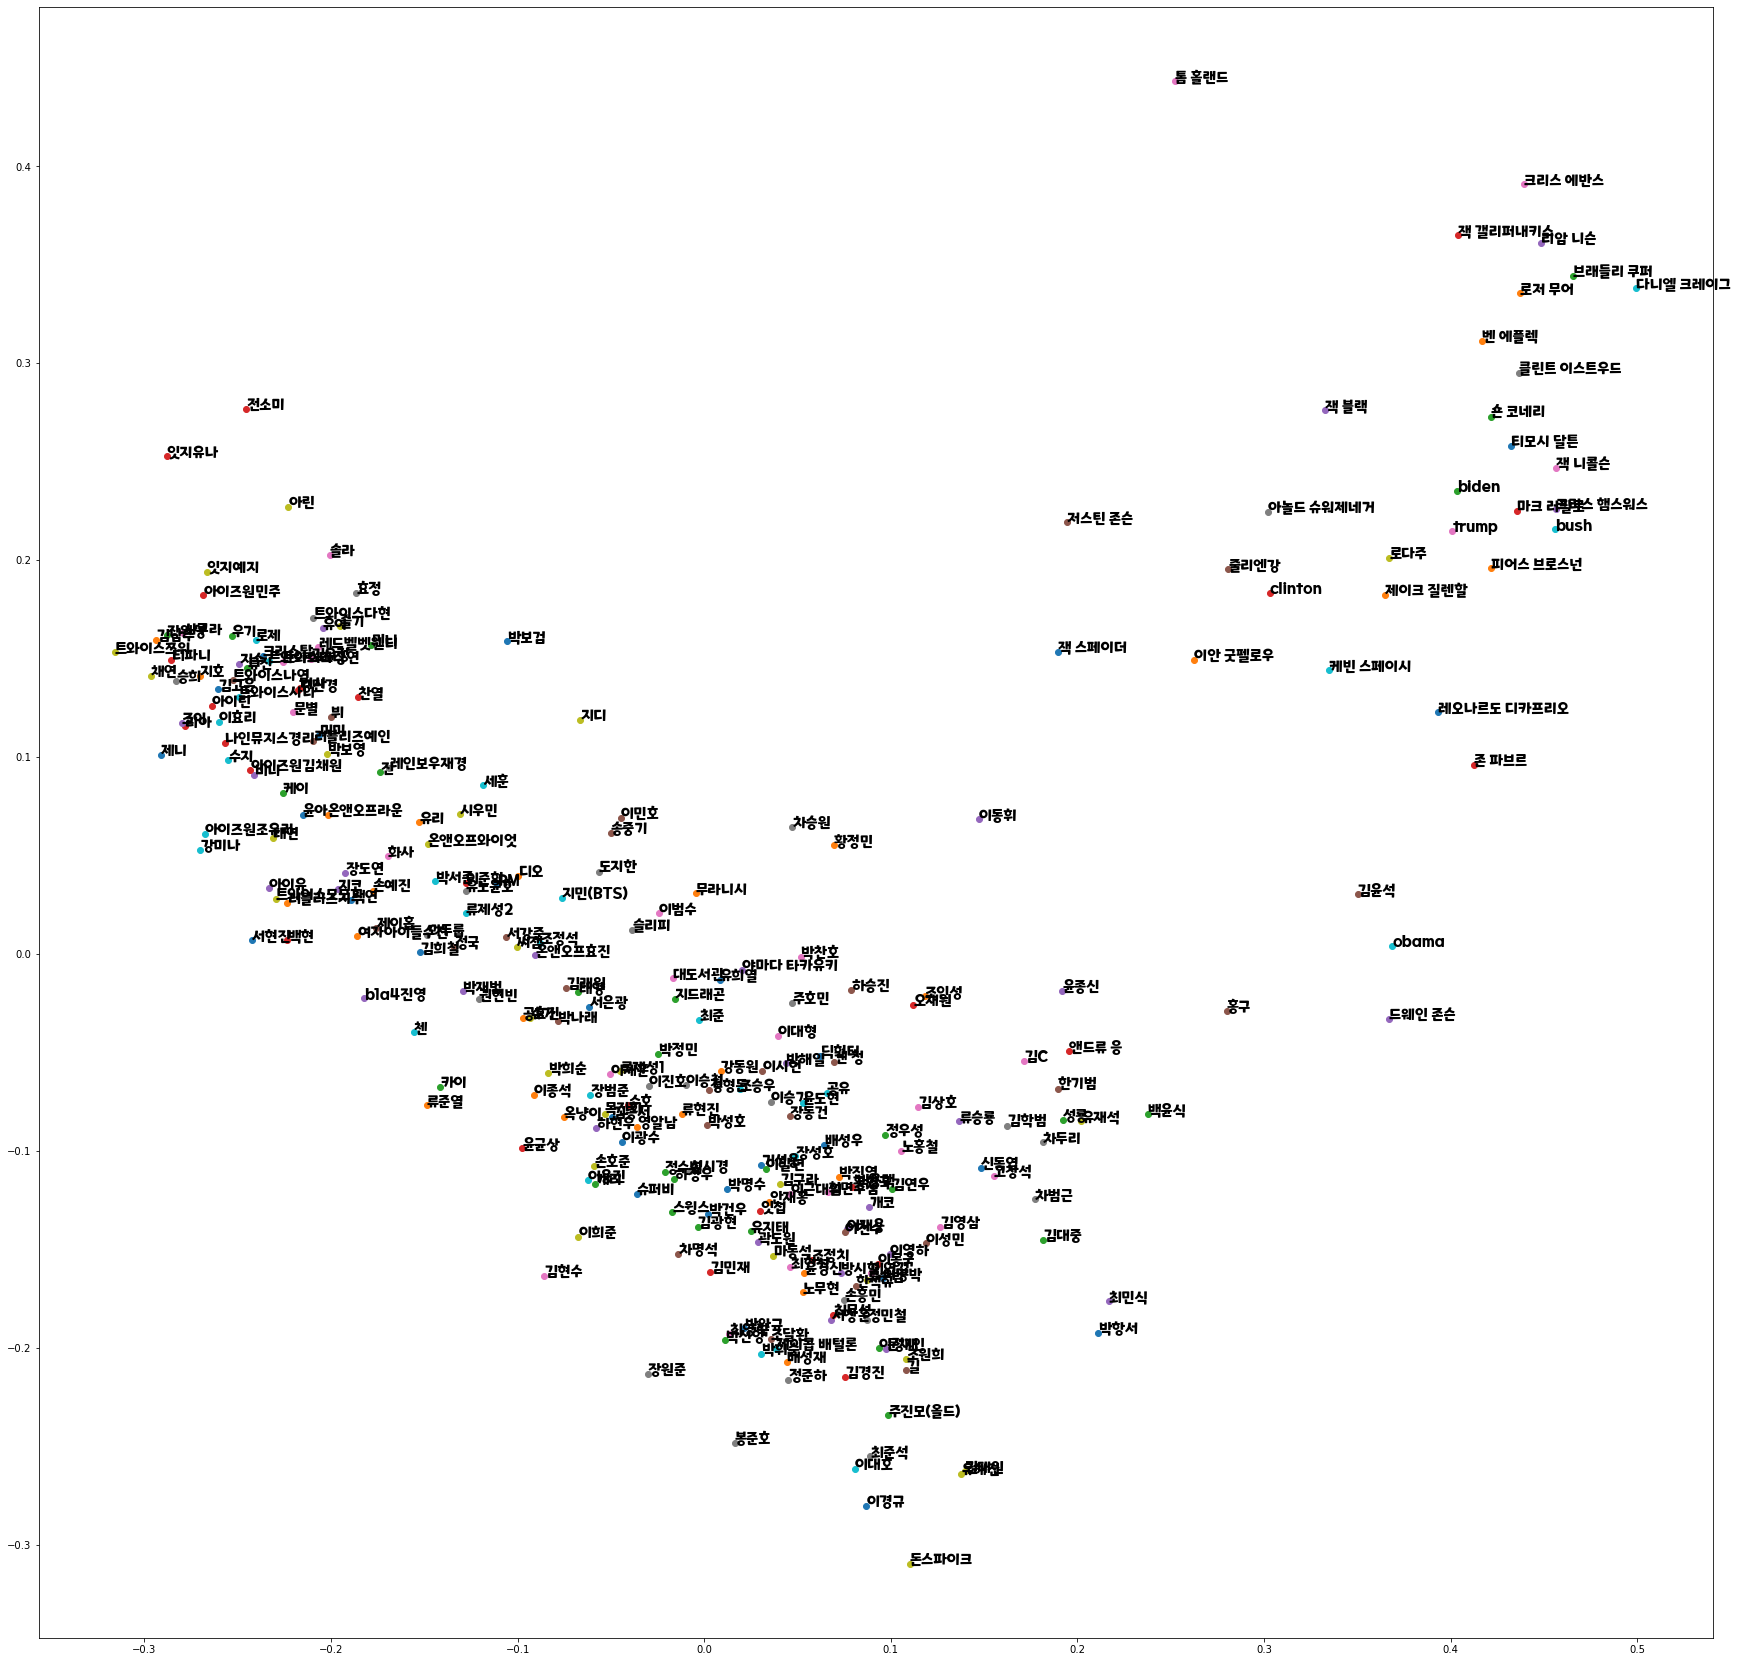

In [61]:
plt.figure(figsize=(30,30))

for i, txt in enumerate(keys):
    plt.scatter(pca_2d[i][0],pca_2d[i][1])
    plt.annotate(txt, (pca_2d[i][0],pca_2d[i][1]),fontproperties=fontprop)

plt.show()

### 2) TSNE visualization

In [42]:
tsne = TSNE(n_components=2, random_state=0)
value_2d = tsne.fit_transform(df)
print(value_2d[0])
value_2d

[13.391564   0.9597159]


array([[ 1.33915644e+01,  9.59715903e-01],
       [ 1.00764284e+01,  1.34656692e+00],
       [ 8.19214582e-01,  9.20161903e-02],
       [ 1.37068129e+01, -7.25688040e-01],
       [ 1.70297575e+00,  4.44309860e-01],
       [ 5.14991093e+00, -1.85940170e+00],
       [-1.06524334e+01,  1.01219664e+01],
       [ 1.40913191e+01, -5.32724190e+00],
       [ 7.03542948e+00,  4.26467466e+00],
       [-5.58557844e+00,  2.47430861e-01],
       [-7.77436304e+00,  3.82241867e-02],
       [ 2.64855552e+00,  1.08399582e+00],
       [-1.09759789e+01,  8.76498318e+00],
       [-2.35429692e+00,  4.16018820e+00],
       [-4.79566240e+00,  3.55796099e+00],
       [-6.86492825e+00,  8.08093643e+00],
       [ 1.11787510e+01,  1.86081421e+00],
       [ 1.53840506e+00,  2.18126342e-01],
       [ 2.39680910e+00, -1.05419123e+00],
       [-1.95500457e+00, -1.14497900e+00],
       [ 1.35701910e-01, -4.87195492e-01],
       [ 1.19789963e+01,  5.33602655e-01],
       [-7.09609175e+00,  5.29061747e+00],
       [-1.

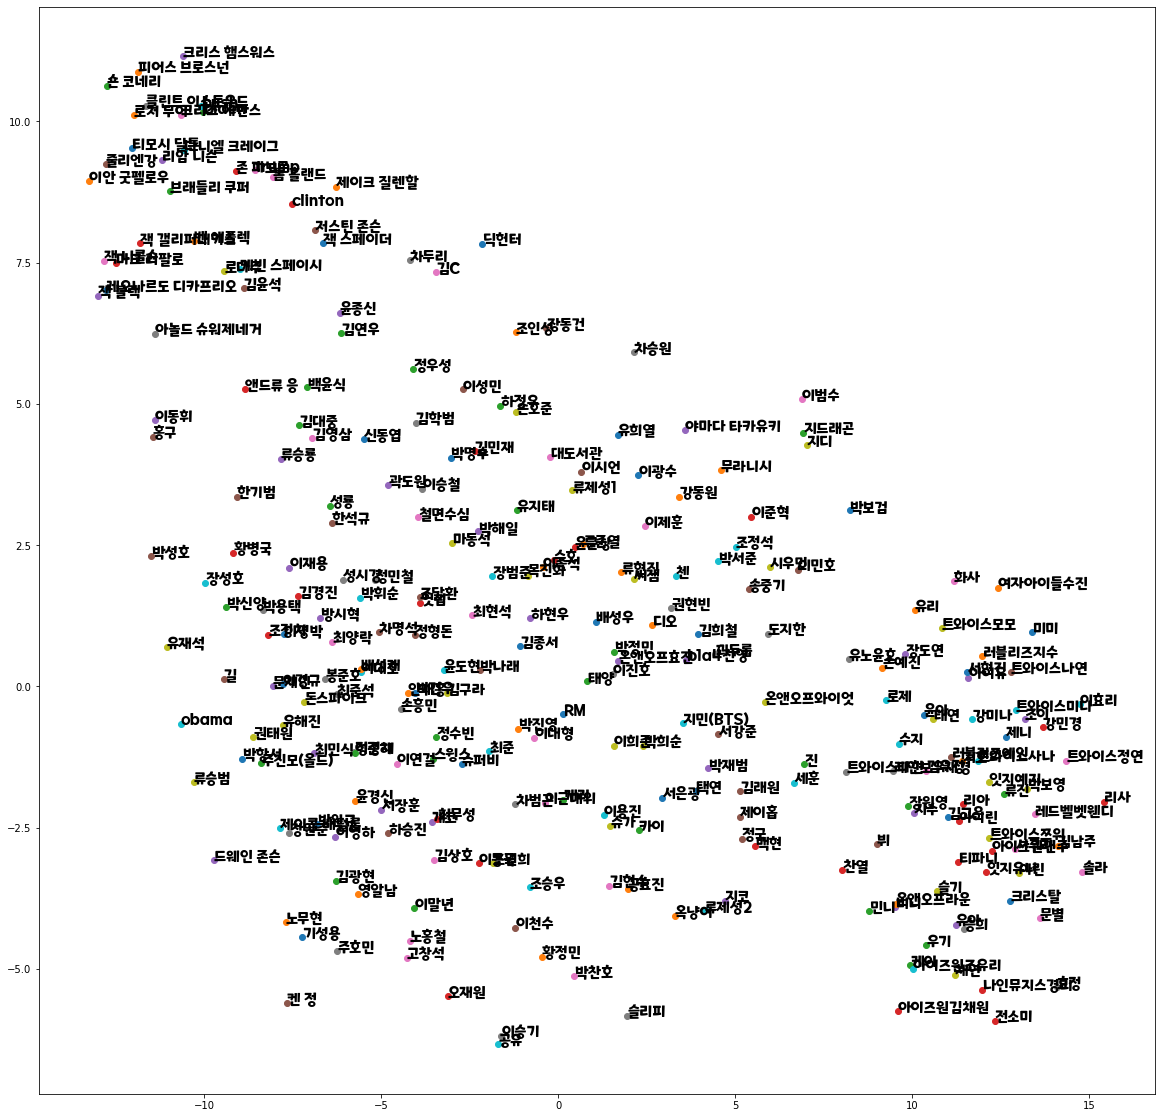

In [58]:
plt.figure(figsize=(20,20))

for i, txt in enumerate(keys):
    plt.scatter(value_2d[i][0],value_2d[i][1])
    plt.annotate(txt, (value_2d[i][0],value_2d[i][1]),fontproperties=fontprop)

plt.show()

## Retrospect

1) I was surprised that the additional images of celebs to which i've heard once I am similar ranked high( 장범준, 이시언)

2) for 2d visualization, 128-d Embedding layer was reduced again to 2-d in dimension, which distored the values of distance I guess for two times of dimension reduction. So there is some difference between 128-d based similarity and 2-d based similarity. There are some points of the actual meaning of 'Embedding Layer'.

3)t-SNE is better for only visualization, and PCA is better for keeping relative values. 